In [1]:
# import nessary labraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import the data
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [3]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [4]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill NaN values in numeric columns with their respective means
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-4-6636120e5734>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [5]:
# droping the remaining null values
df.dropna(inplace=True)

In [6]:
# checking for the null values
df.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [7]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       811 non-null    float64
 1   Time_of_Day            811 non-null    object 
 2   Day_of_Week            811 non-null    object 
 3   Passenger_Count        811 non-null    float64
 4   Traffic_Conditions     811 non-null    object 
 5   Weather                811 non-null    object 
 6   Base_Fare              811 non-null    float64
 7   Per_Km_Rate            811 non-null    float64
 8   Per_Minute_Rate        811 non-null    float64
 9   Trip_Duration_Minutes  811 non-null    float64
 10  Trip_Price             811 non-null    float64
dtypes: float64(7), object(4)
memory usage: 76.0+ KB


In [8]:
# label encoding for the object in te df
le = LabelEncoder()
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       811 non-null    float64
 1   Time_of_Day            811 non-null    int64  
 2   Day_of_Week            811 non-null    int64  
 3   Passenger_Count        811 non-null    float64
 4   Traffic_Conditions     811 non-null    int64  
 5   Weather                811 non-null    int64  
 6   Base_Fare              811 non-null    float64
 7   Per_Km_Rate            811 non-null    float64
 8   Per_Minute_Rate        811 non-null    float64
 9   Trip_Duration_Minutes  811 non-null    float64
 10  Trip_Price             811 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.0 KB


In [10]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.800000,0.320000,53.82,36.262400
1,47.590000,0,0,1.0,0,0,3.502989,0.620000,0.430000,40.57,56.874773
2,36.870000,1,1,1.0,0,0,2.700000,1.210000,0.150000,37.27,52.903200
4,27.070547,1,0,3.0,0,0,2.930000,0.630000,0.320000,22.64,15.618000
5,8.640000,0,1,2.0,2,0,2.550000,1.710000,0.480000,89.33,60.202800
...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,0,1,4.0,2,0,2.390000,0.620000,0.490000,58.39,34.404900
996,45.950000,3,0,4.0,2,0,3.120000,0.610000,0.292916,61.96,62.129500
997,7.700000,2,0,3.0,1,1,2.080000,1.780000,0.292916,54.18,33.123600
998,47.560000,2,0,1.0,1,0,2.670000,0.820000,0.170000,114.94,61.209000


In [11]:
# make a coralation matrix
df.corr()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.036099,-0.055890,-0.033618,-0.084212,0.002638,0.018987,-0.031719,-0.046357,-0.014432,0.833846
Time_of_Day,-0.036099,1.000000,0.000731,0.024902,-0.001120,-0.004294,0.036305,0.066991,-0.026864,0.015874,-0.025550
Day_of_Week,-0.055890,0.000731,1.000000,0.019493,0.047206,0.017754,-0.016471,-0.053745,-0.001116,-0.007064,-0.056610
Passenger_Count,-0.033618,0.024902,0.019493,1.000000,0.018190,0.023562,0.038804,0.054784,0.044568,0.020155,0.006395
Traffic_Conditions,-0.084212,-0.001120,0.047206,0.018190,1.000000,0.065983,0.015802,0.011082,0.022067,0.012930,-0.079495
Weather,0.002638,-0.004294,0.017754,0.023562,0.065983,1.000000,-0.034755,0.046653,-0.015807,0.038155,0.025066
Base_Fare,0.018987,0.036305,-0.016471,0.038804,0.015802,-0.034755,1.000000,0.017023,-0.030323,0.034684,0.026285
Per_Km_Rate,-0.031719,0.066991,-0.053745,0.054784,0.011082,0.046653,0.017023,1.000000,0.020760,0.043719,0.248681
Per_Minute_Rate,-0.046357,-0.026864,-0.001116,0.044568,0.022067,-0.015807,-0.030323,0.020760,1.000000,-0.007651,0.109352
Trip_Duration_Minutes,-0.014432,0.015874,-0.007064,0.020155,0.012930,0.038155,0.034684,0.043719,-0.007651,1.000000,0.219064


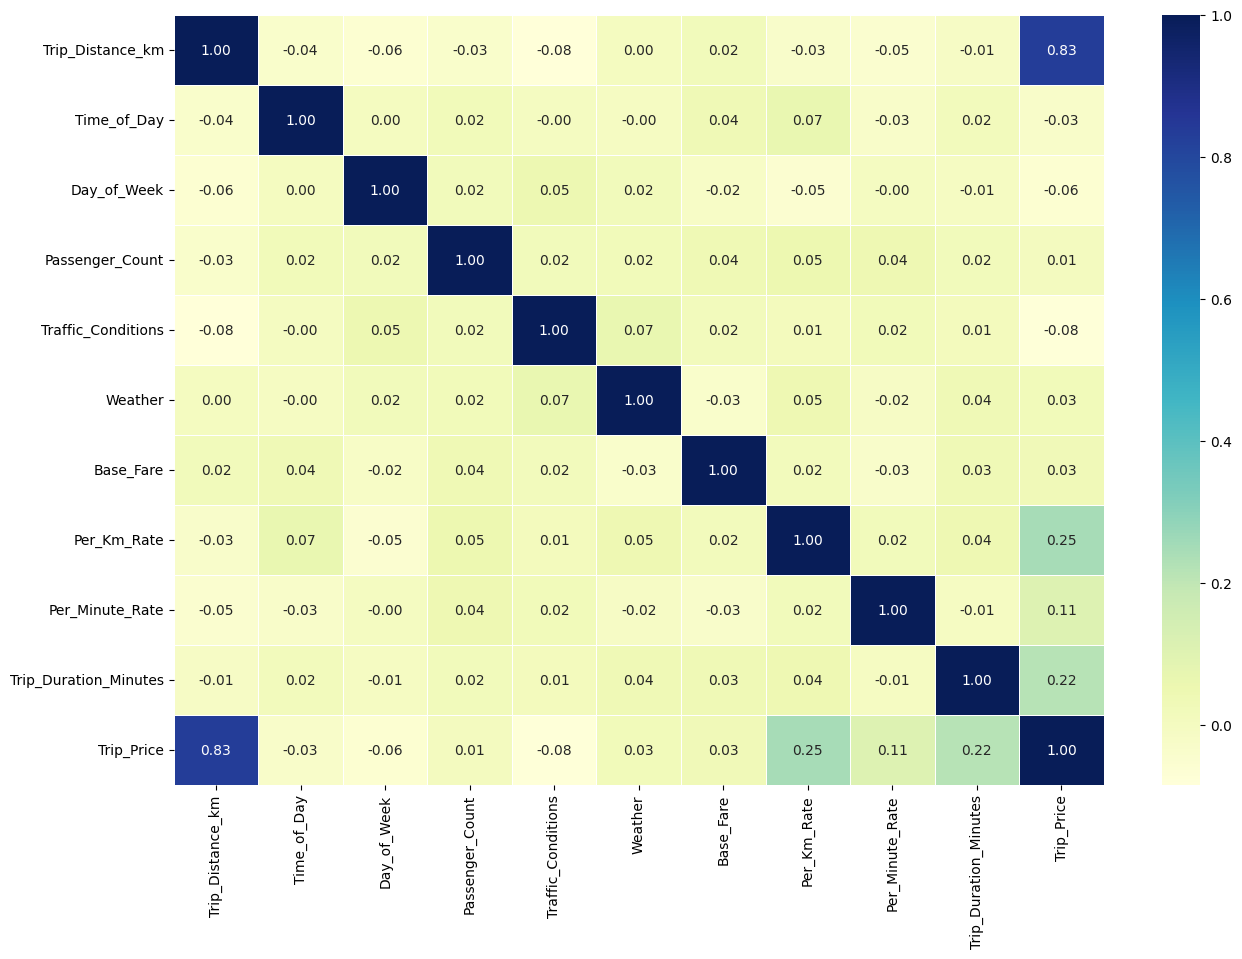

In [12]:
# lets make the corelation matrix more prettier

corr_matix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.show()

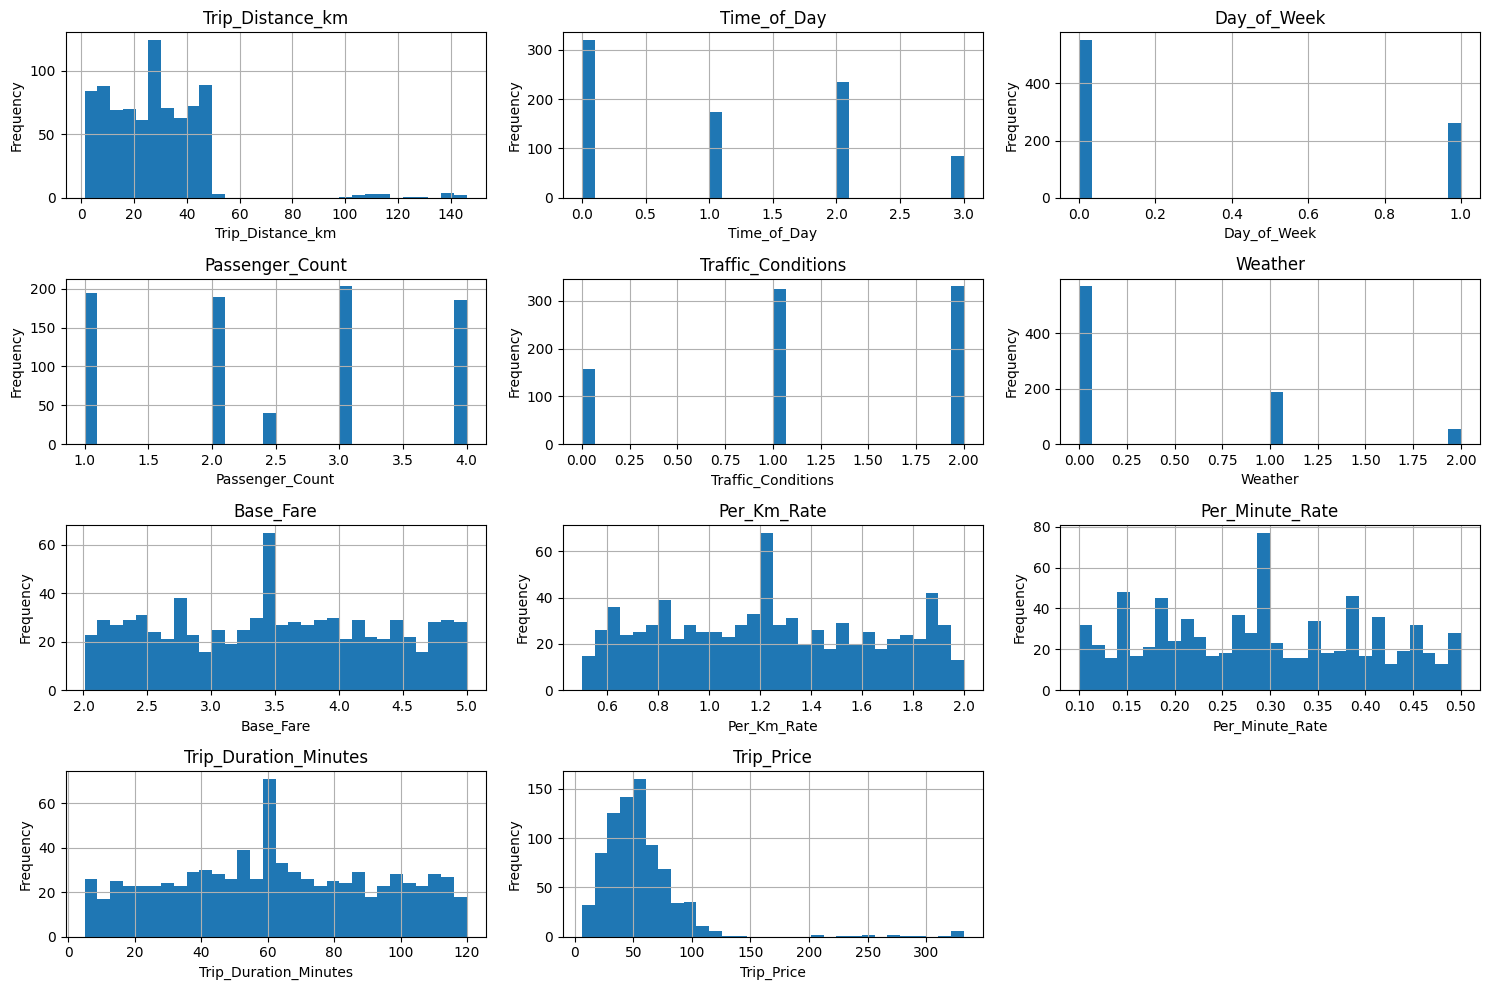

In [13]:
df.hist(figsize=(15, 10), bins=30)  # Histograms for all columns

# Add labels to the histograms
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())  # Set x-axis label to column name
    ax.set_ylabel("Frequency")  # Set y-axis label to "Frequency"

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [14]:

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select only numeric features for normalization
numeric_features = df.select_dtypes(include=['number']).columns

# Fit the scaler to the numeric features and transform them
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [15]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0.124864,0.666667,0.0,0.666667,0.5,0.0,0.518395,0.200000,0.550,0.425063,0.092464
1,0.319896,0.000000,0.0,0.000000,0.0,0.0,0.499328,0.080000,0.825,0.309675,0.155708
2,0.245861,0.333333,1.0,0.000000,0.0,0.0,0.230769,0.473333,0.125,0.280937,0.143522
4,0.178184,0.333333,0.0,0.666667,0.0,0.0,0.307692,0.086667,0.550,0.153531,0.029121
5,0.050899,0.000000,1.0,0.333333,1.0,0.0,0.180602,0.806667,0.950,0.734303,0.165919


In [16]:
# GEtting the x and y
X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

In [17]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# put the model in the dictionary
models = {"Linear Regression": LinearRegression(),
          "Lesso": Lasso(),
          "BayesianRidge": BayesianRidge()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluate the machine learning model
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model score
    model_score = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model = model.fit(x_train, y_train)  # Use x_train and y_train here
        # Evaluate the model and append its score to model_scores
        model_score[name] = model.score(x_test, y_test)  # Use x_test and y_test here
    return model_score

# Call the function to fit and score the models
model_score = fit_and_score(models=models,
                           x_train=X_train,  # Pass X_train, X_test, y_train, y_test
                           x_test=X_test,
                           y_train=y_train,
                           y_test=y_test)


print(model_score)

{'Linear Regression': 0.8806649425688231, 'Lesso': -0.0011323146542703277, 'BayesianRidge': 0.8809375878206416}


In [19]:
# Going with the linaer regression
linear_regression_model = models["Linear Regression"]
linear_regression_model.fit(X_train, y_train) # Fit the model

LinearRegression()

In [20]:
# checking the score for the linaer regression
linear_regression_model.score(X_test, y_test)

0.8806649425688231

In [21]:
# getting mean squred error
y_pred = linear_regression_model.predict(X_test)
train_mse = mean_squared_error(y_test, y_pred)

print(f"Train dataset Mean Squared Error: {train_mse}")

Train dataset Mean Squared Error: 0.0017122270632413256


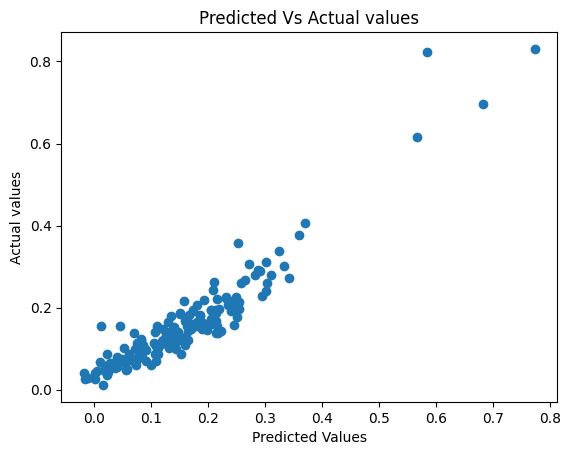

In [22]:
# visuals of actual vs predicted
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.title("Predicted Vs Actual values")
plt.show()

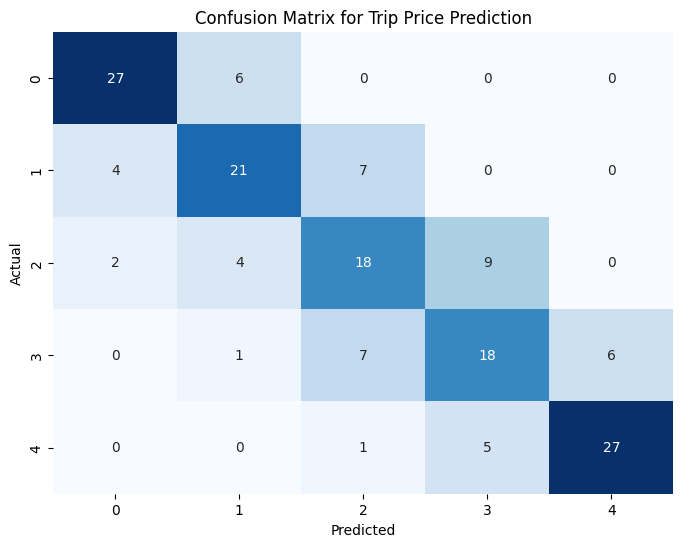

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Discretize the target variable (Trip_Price)
num_bins = 5  # Number of bins for discretization
y_test_bins = pd.qcut(y_test, q=num_bins, labels=False)
y_pred_bins = pd.qcut(y_pred, q=num_bins, labels=False)

# Generate the confusion matrix
cm = confusion_matrix(y_test_bins, y_pred_bins)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Trip Price Prediction")
plt.show()